In [40]:
import numpy as numpy
import pandas as pd 
import seaborn as sbrn 
import matplotlib.pyplot as plt


##Reading Data

In [2]:
df = pd.read_csv("3yearsuntouched.csv")

In [3]:
df

,Unnamed: 0,Year,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Zipcode,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset
0,2,2016,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,State Route 32,Williamsburg,...,45176,US/Eastern,KI69,36.0,33.3,10.0,SW,Overcast,True,Night
1,3,2016,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,I-75 S,Dayton,...,45417,US/Eastern,KDAY,35.1,31.0,9.0,SW,Mostly Cloudy,False,Night
2,4,2016,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,Dayton,...,45459,US/Eastern,KMGY,36.0,33.3,6.0,SW,Mostly Cloudy,True,Day
3,5,2016,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Westerville Rd,Westerville,...,43081,US/Eastern,KCMH,37.9,35.5,7.0,SSW,Light Rain,False,Day
4,6,2016,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,N Woodward Ave,Dayton,...,45417-2476,US/Eastern,KDAY,34.0,31.0,7.0,WSW,Overcast,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314280,7652504,2017,2,2017-08-29 14:32:25,2017-08-29 20:32:25,28.879630,-82.092960,0.722,I-75 S,Wildwood,...,34785,US/Eastern,KVVG,80.0,80.0,10.0,VAR,Light Rain with Thunder,False,Day
314281,7652579,2017,2,2017-08-29 15:15:51,2017-08-29 21:15:51,37.993881,-92.795869,0.000,Sunny Slope Dr,Camdenton,...,65020,US/Central,KH21,75.0,75.0,10.0,N,Cloudy,False,Day
314282,7652658,2017,2,2017-08-29 15:55:36,2017-08-29 21:55:36,46.617235,-113.051251,0.000,US-12 W,Drummond,...,59832,US/Mountain,K3DU,89.0,89.0,3.0,SSE,Haze,False,Day
314283,7653119,2017,4,2017-08-30 05:08:21,2017-08-30 11:08:21,46.672100,-113.153690,9.486,US-12 W,Drummond,...,59832,US/Mountain,K3DU,57.0,57.0,4.0,CALM,Haze,False,Night


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314285 entries, 0 to 314284
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         314285 non-null  int64  
 1   Year               314285 non-null  int64  
 2   Severity           314285 non-null  int64  
 3   Start_Time         314285 non-null  object 
 4   End_Time           314285 non-null  object 
 5   Start_Lat          314285 non-null  float64
 6   Start_Lng          314285 non-null  float64
 7   Distance(mi)       314285 non-null  float64
 8   Street             314285 non-null  object 
 9   City               314285 non-null  object 
 10  County             314285 non-null  object 
 11  State              314285 non-null  object 
 12  Zipcode            314285 non-null  object 
 13  Timezone           314285 non-null  object 
 14  Airport_Code       314285 non-null  object 
 15  Temperature(F)     314285 non-null  float64
 16  Wi

In [14]:
df.iat[0,3]

'2016-02-08 06:49:27'

In [23]:
df.iat[0,4]

'2016-02-08 07:19:27'

In [15]:
for i in range(314284):
    if(len(df.iat[i,3])>19 or len(df.iat[i,4])>19):
        df.iat[i,3] = df.iat[i,3][:19]
        df.iat[i,4] = df.iat[i,4][:19]

In [25]:
Start_Time = pd.to_datetime(df.Start_Time)
End_Time = pd.to_datetime(df.End_Time)
Time_Diff = (End_Time - Start_Time).astype('timedelta64[s]')


In [22]:
Time_Diff

0        0 days 00:30:00
1        0 days 00:30:00
2        0 days 00:30:00
3        0 days 00:30:00
4        0 days 00:30:00
               ...      
314280   0 days 06:00:00
314281   0 days 06:00:00
314282   0 days 06:00:00
314283   0 days 06:00:00
314284   0 days 06:00:00
Length: 314285, dtype: timedelta64[ns]

In [26]:
min(Time_Diff)

Timedelta('0 days 00:07:00')

In [29]:
max(End_Time)

Timestamp('2022-07-20 10:49:45')

In [30]:
min(Start_Time)

Timestamp('2016-01-14 20:18:33')

In [28]:
max(Time_Diff)

Timedelta('1553 days 01:25:45')

In [27]:
df['TimeDiff'] = Time_Diff

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314285 entries, 0 to 314284
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         314285 non-null  int64         
 1   Year               314285 non-null  int64         
 2   Severity           314285 non-null  int64         
 3   Start_Time         314285 non-null  object        
 4   End_Time           314285 non-null  object        
 5   Start_Lat          314285 non-null  float64       
 6   Start_Lng          314285 non-null  float64       
 7   Distance(mi)       314285 non-null  float64       
 8   Street             314285 non-null  object        
 9   City               314285 non-null  object        
 10  County             314285 non-null  object        
 11  State              314285 non-null  object        
 12  Zipcode            314285 non-null  object        
 13  Timezone           314285 non-null  object  

In [32]:
new = df.drop(columns=['Start_Time','End_Time','Zipcode','Timezone'])

In [33]:
new

,Unnamed: 0,Year,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
0,2,2016,2,39.063148,-84.032608,0.010,State Route 32,Williamsburg,Clermont,OH,KI69,36.0,33.3,10.0,SW,Overcast,True,Night,0 days 00:30:00
1,3,2016,3,39.747753,-84.205582,0.010,I-75 S,Dayton,Montgomery,OH,KDAY,35.1,31.0,9.0,SW,Mostly Cloudy,False,Night,0 days 00:30:00
2,4,2016,2,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,Dayton,Montgomery,OH,KMGY,36.0,33.3,6.0,SW,Mostly Cloudy,True,Day,0 days 00:30:00
3,5,2016,3,40.100590,-82.925194,0.010,Westerville Rd,Westerville,Franklin,OH,KCMH,37.9,35.5,7.0,SSW,Light Rain,False,Day,0 days 00:30:00
4,6,2016,2,39.758274,-84.230507,0.000,N Woodward Ave,Dayton,Montgomery,OH,KDAY,34.0,31.0,7.0,WSW,Overcast,False,Day,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314280,7652504,2017,2,28.879630,-82.092960,0.722,I-75 S,Wildwood,Sumter,FL,KVVG,80.0,80.0,10.0,VAR,Light Rain with Thunder,False,Day,0 days 06:00:00
314281,7652579,2017,2,37.993881,-92.795869,0.000,Sunny Slope Dr,Camdenton,Camden,MO,KH21,75.0,75.0,10.0,N,Cloudy,False,Day,0 days 06:00:00
314282,7652658,2017,2,46.617235,-113.051251,0.000,US-12 W,Drummond,Granite,MT,K3DU,89.0,89.0,3.0,SSE,Haze,False,Day,0 days 06:00:00
314283,7653119,2017,4,46.672100,-113.153690,9.486,US-12 W,Drummond,Granite,MT,K3DU,57.0,57.0,4.0,CALM,Haze,False,Night,0 days 06:00:00


In [35]:
new.to_csv("Data/Cleandata.csv")

In [36]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314285 entries, 0 to 314284
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         314285 non-null  int64         
 1   Year               314285 non-null  int64         
 2   Severity           314285 non-null  int64         
 3   Start_Lat          314285 non-null  float64       
 4   Start_Lng          314285 non-null  float64       
 5   Distance(mi)       314285 non-null  float64       
 6   Street             314285 non-null  object        
 7   City               314285 non-null  object        
 8   County             314285 non-null  object        
 9   State              314285 non-null  object        
 10  Airport_Code       314285 non-null  object        
 11  Temperature(F)     314285 non-null  float64       
 12  Wind_Chill(F)      314285 non-null  float64       
 13  Visibility(mi)     314285 non-null  float64 

Duplicate Data Check and Removal

In [37]:
duplicate = new.duplicated().sum()
print('There are {} duplicated rows in the dataframe currently'.format(duplicate))
new.drop_duplicates(inplace=True)
new.reset_index(inplace=True, drop=True)
duplicate = new.duplicated().sum()
print('There are {} duplicated rows in the dataframe after duplicate removal'.format(duplicate))
new

There are 0 duplicated rows in the dataframe currently
There are 0 duplicated rows in the dataframe after duplicate removal


,Unnamed: 0,Year,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
0,2,2016,2,39.063148,-84.032608,0.010,State Route 32,Williamsburg,Clermont,OH,KI69,36.0,33.3,10.0,SW,Overcast,True,Night,0 days 00:30:00
1,3,2016,3,39.747753,-84.205582,0.010,I-75 S,Dayton,Montgomery,OH,KDAY,35.1,31.0,9.0,SW,Mostly Cloudy,False,Night,0 days 00:30:00
2,4,2016,2,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,Dayton,Montgomery,OH,KMGY,36.0,33.3,6.0,SW,Mostly Cloudy,True,Day,0 days 00:30:00
3,5,2016,3,40.100590,-82.925194,0.010,Westerville Rd,Westerville,Franklin,OH,KCMH,37.9,35.5,7.0,SSW,Light Rain,False,Day,0 days 00:30:00
4,6,2016,2,39.758274,-84.230507,0.000,N Woodward Ave,Dayton,Montgomery,OH,KDAY,34.0,31.0,7.0,WSW,Overcast,False,Day,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314280,7652504,2017,2,28.879630,-82.092960,0.722,I-75 S,Wildwood,Sumter,FL,KVVG,80.0,80.0,10.0,VAR,Light Rain with Thunder,False,Day,0 days 06:00:00
314281,7652579,2017,2,37.993881,-92.795869,0.000,Sunny Slope Dr,Camdenton,Camden,MO,KH21,75.0,75.0,10.0,N,Cloudy,False,Day,0 days 06:00:00
314282,7652658,2017,2,46.617235,-113.051251,0.000,US-12 W,Drummond,Granite,MT,K3DU,89.0,89.0,3.0,SSE,Haze,False,Day,0 days 06:00:00
314283,7653119,2017,4,46.672100,-113.153690,9.486,US-12 W,Drummond,Granite,MT,K3DU,57.0,57.0,4.0,CALM,Haze,False,Night,0 days 06:00:00


Null Data Check and Removal

In [42]:
new.isnull().sum()

Unnamed: 0           0
Year                 0
Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Street               0
City                 0
County               0
State                0
Airport_Code         0
Temperature(F)       0
Wind_Chill(F)        0
Visibility(mi)       0
Wind_Direction       0
Weather_Condition    0
Traffic_Signal       0
Sunrise_Sunset       0
TimeDiff             0
dtype: int64

In [44]:
Withouttd = new.drop(columns=['TimeDiff'])

<Figure size 1000x500 with 0 Axes>

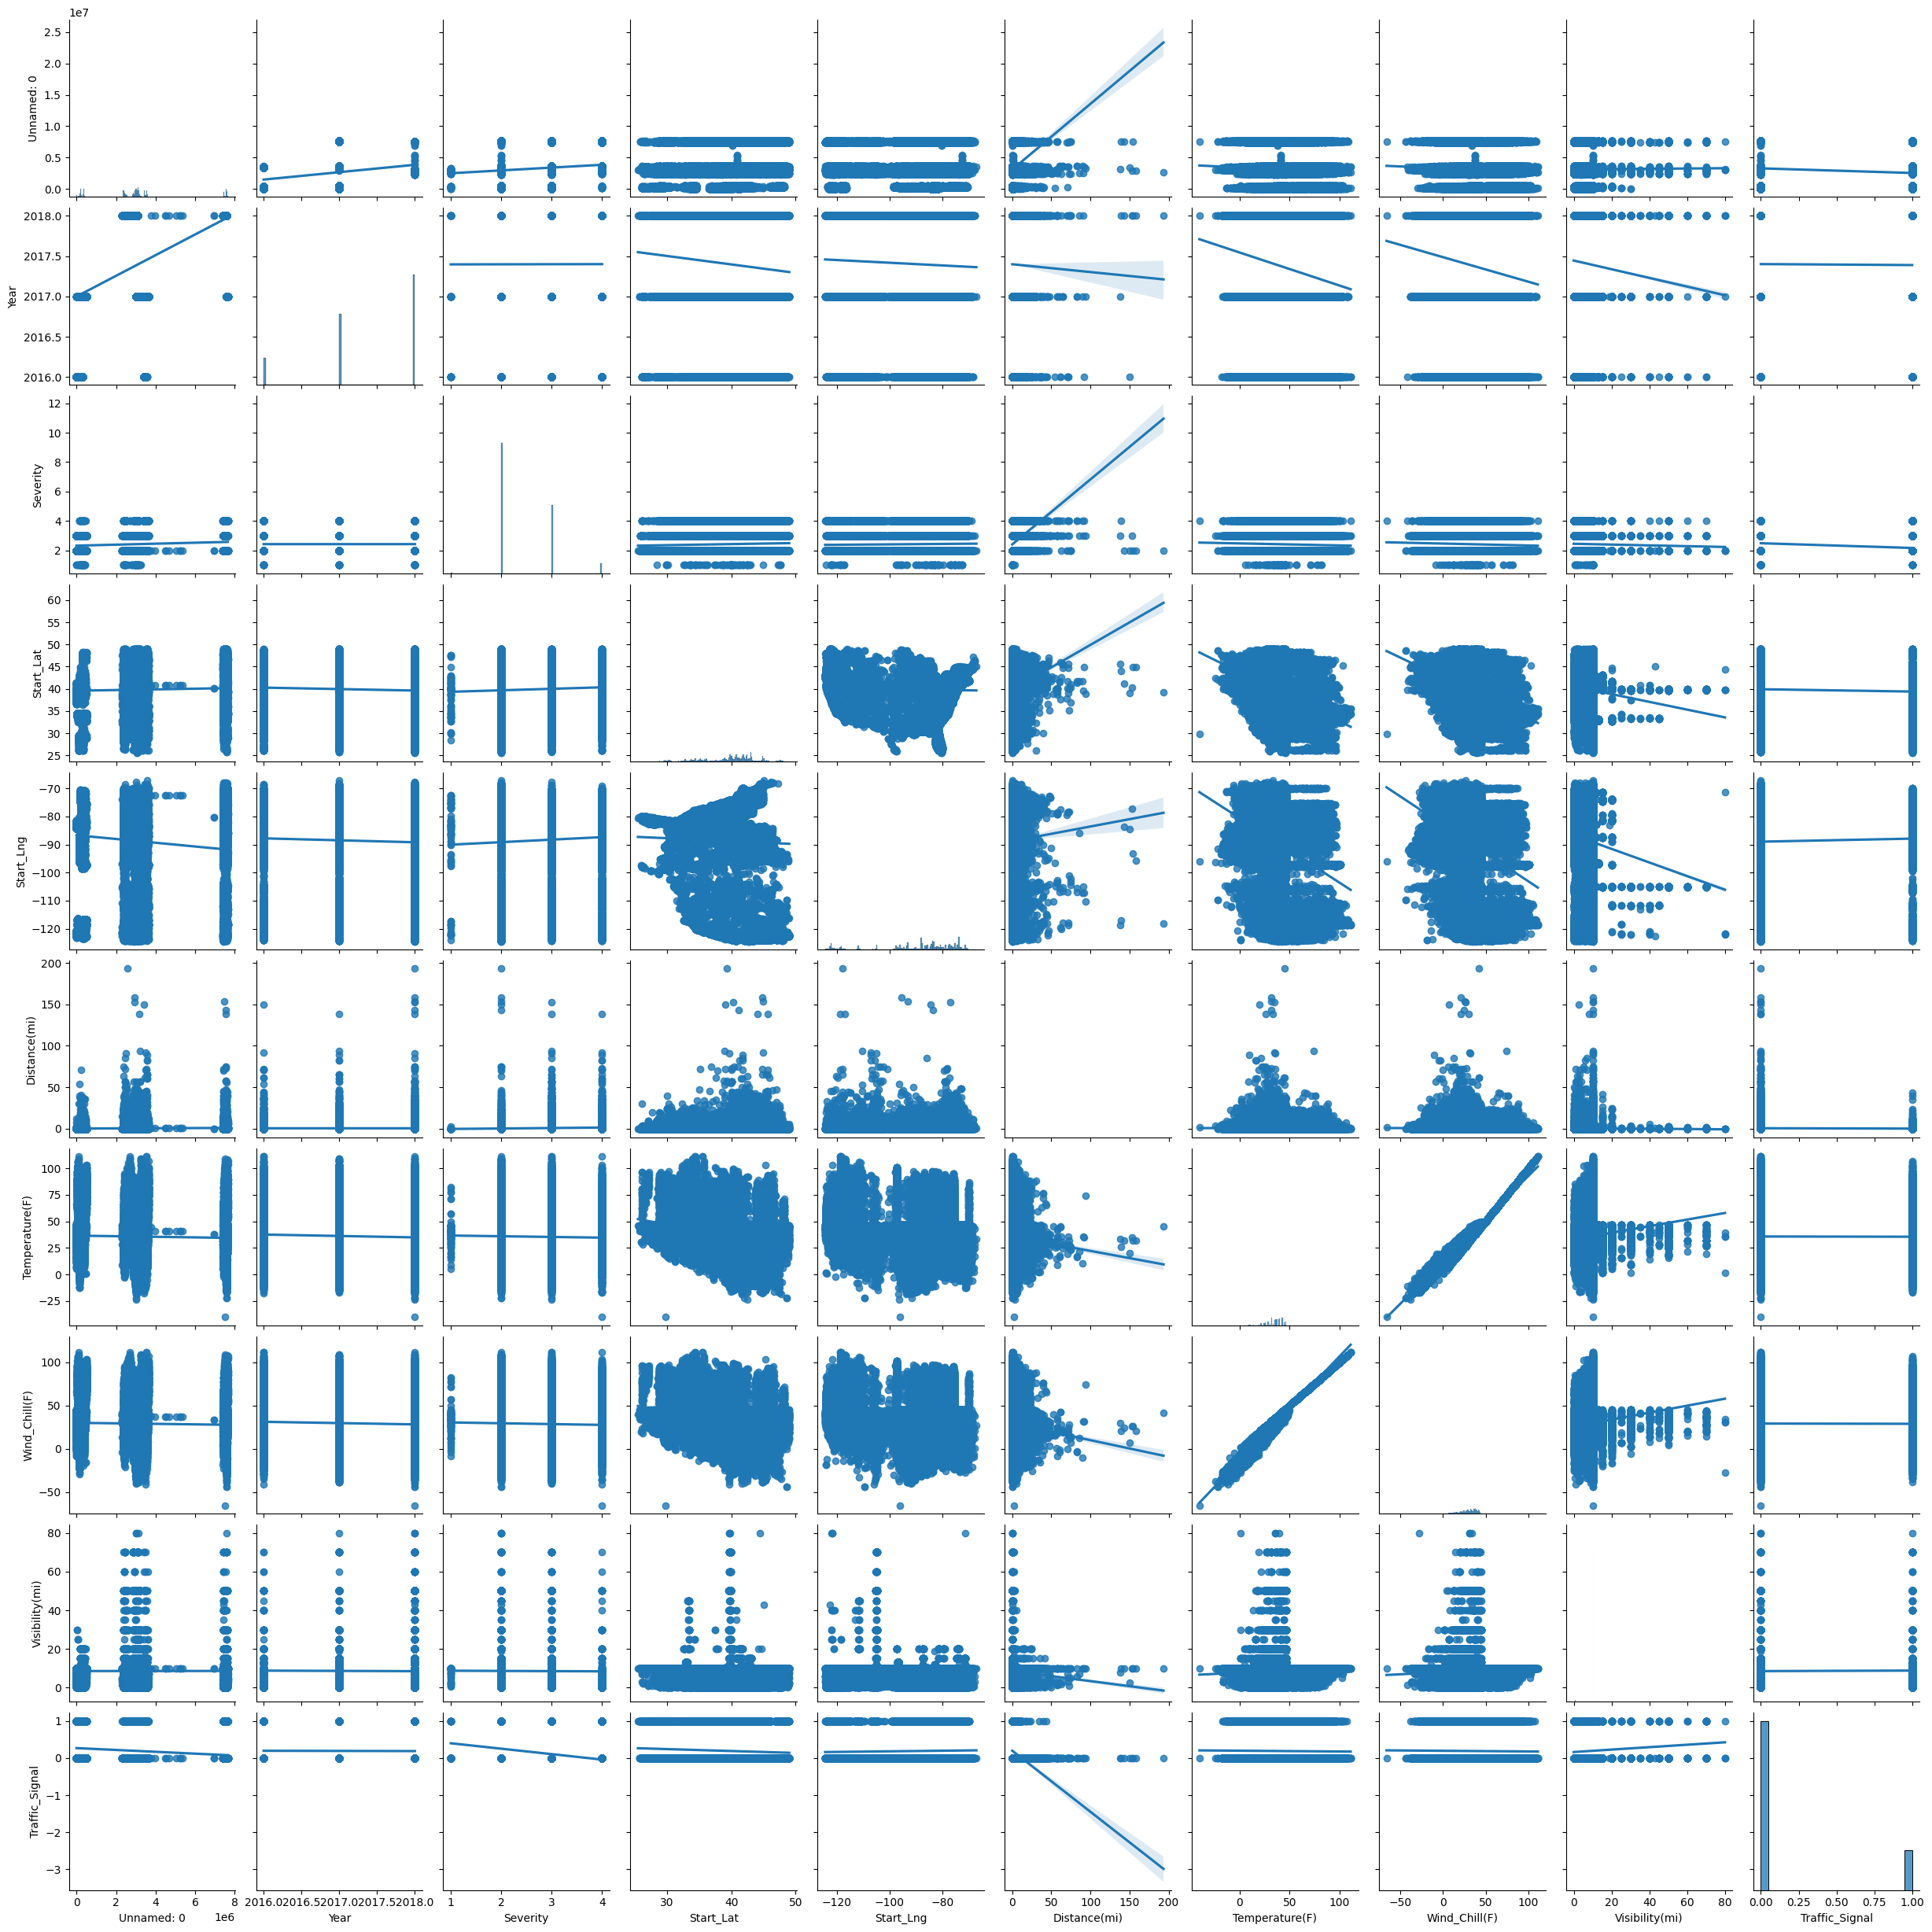

In [45]:
plt.figure(figsize=(10,5))
sbrn.pairplot(Withouttd,kind="reg")
plt.show()

/tmp/ipykernel_6746/1545244574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c = sbrn.countplot(x="Year", data=new, orient = 'v', palette = "crest")


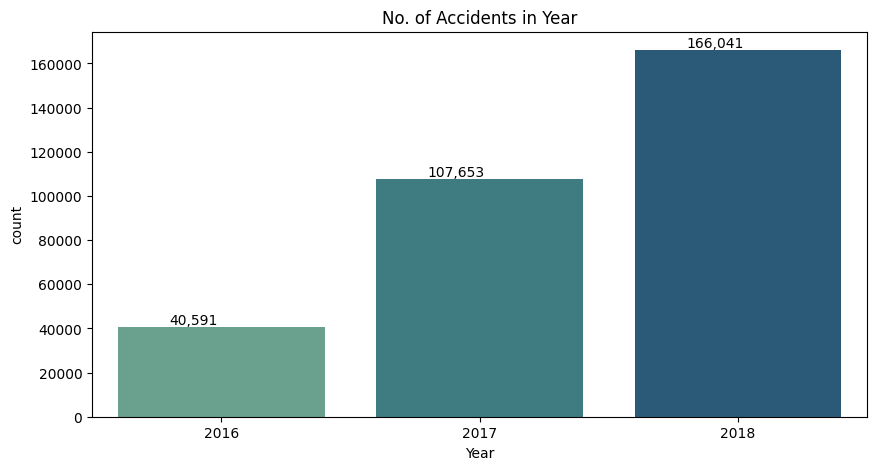

In [46]:
fig, ax = plt.subplots(figsize = (10,5))
c = sbrn.countplot(x="Year", data=new, orient = 'v', palette = "crest")
# plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+1000
    ax.annotate(count, (x, y))
plt.show()

In [41]:
plt.figure
sbrn.pairplot(new,kind="scatter")            #scatter plots between all 9 numerical columns
plt.show()

UFuncTypeError: Cannot cast ufunc 'equal' input 0 from dtype('<m8[s]') to dtype('<m8') with casting rule 'same_kind'

In [ ]:
# Importing
# Create the dataframe
column_name = new.feature_names
df_new = pd.DataFrame(new.data)
df_new .columns = column_name
df_new .head()
print("Old Shape: ", new.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_new['Start_Lat'].quantile(0.25)
Q3 = df_new['Start_Lat'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = numpy.where(df_new['Start_Lat']>=upper)[0]
lower_array = numpy.where(df_new['Start_Lat']<=lower)[0]

print(upper_array)
print(lower_array)
# Removing the outliers
# new.drop(index=upper_array, inplace=True)
# new.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", new.shape)
